In [1]:
import pandas as pd
import numpy as np

In [2]:
for i in range(1, 9):
    df = pd.read_csv(f'dataset/dataset_{i}_processed.csv')
    if i == 1:
        df_all = df
    else:
        df_all = pd.concat([df_all, df])

In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74081 entries, 0 to 9259
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   text                        74081 non-null  object 
 1   label                       74081 non-null  int64  
 2   multi_label                 74081 non-null  object 
 3   split                       74081 non-null  object 
 4   language                    74081 non-null  object 
 5   length                      74081 non-null  int64  
 6   source                      74081 non-null  object 
 7   word_count                  74081 non-null  float64
 8   unique_word_count           74081 non-null  float64
 9   char_count                  74081 non-null  float64
 10  avg_word_length             74081 non-null  float64
 11  ttr                         74081 non-null  float64
 12  hapax_legomenon             74081 non-null  float64
 13  sentence_count              74081 non

In [4]:
df_all.head()

,text,label,multi_label,split,language,length,source,word_count,unique_word_count,char_count,...,question_mark_count,exclamation_mark_count,flesch_reading_ease,gunning_fog_index,first_person_pronoun_count,person_entity_count,date_entity_count,uniqueness_bigram,uniqueness_trigram,syntax_variety
0,Der Ausbruch des Coronavirus hat die Entwicklu...,1,text-davinci-003,test,de,174,MULTITuDE_MassiveSumm_spiegel,199.0,118.0,1067.0,...,0.0,0.0,-272.022170,11.156030,0.0,0.0,0.0,0.904040,0.979695,12.0
1,Alex Azar was officially sworn in as the U.S. ...,1,text-davinci-003,train,en,57,MULTITuDE_MassiveSumm_voanews,70.0,54.0,311.0,...,0.0,1.0,-186.793214,8.714286,0.0,5.0,2.0,1.000000,1.000000,11.0
2,Європейський союз вимагає зупинити розтрату ко...,1,gpt-3.5-turbo,test,uk,105,MULTITuDE_MassiveSumm_interfax,130.0,82.0,691.0,...,0.0,0.0,-269.236538,11.015385,0.0,0.0,0.0,0.860465,0.929688,14.0
3,"Yesterday, hundreds of Zambian university stud...",1,text-davinci-003,train,en,254,MULTITuDE_MassiveSumm_voanews,292.0,149.0,1419.0,...,0.0,0.0,-231.229869,11.440100,1.0,1.0,1.0,0.876289,0.965517,13.0
4,"In a narrow and highly watched vote, the US Se...",1,gpt-4,train,en,416,MULTITuDE_MassiveSumm_voanews,476.0,242.0,2259.0,...,0.0,0.0,-224.855788,13.160504,1.0,2.0,2.0,0.871579,0.974684,15.0


In [5]:
df_all.to_csv('dataset/dataset_all.csv', index=False)

In [6]:
#list of columns
df_all.columns

Index(['text', 'label', 'multi_label', 'split', 'language', 'length', 'source',
       'word_count', 'unique_word_count', 'char_count', 'avg_word_length',
       'ttr', 'hapax_legomenon', 'sentence_count', 'avg_sentence_length',
       'avg_sentence_complexity', 'punctuation_count', 'noun_count',
       'stopword_count', 'verb_count', 'adj_count', 'adv_count',
       'complex_sentence_count', 'question_mark_count',
       'exclamation_mark_count', 'flesch_reading_ease', 'gunning_fog_index',
       'first_person_pronoun_count', 'person_entity_count',
       'date_entity_count', 'uniqueness_bigram', 'uniqueness_trigram',
       'syntax_variety'],
      dtype='object')

In [7]:
# normalise the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_all_norm = df_all.copy()
statistical_features = ['word_count', 'unique_word_count', 'char_count', 'avg_word_length',
       'ttr', 'hapax_legomenon', 'sentence_count', 'avg_sentence_length',
       'avg_sentence_complexity', 'punctuation_count', 'noun_count',
       'stopword_count', 'verb_count', 'adj_count', 'adv_count',
       'complex_sentence_count', 'question_mark_count',
       'exclamation_mark_count', 'flesch_reading_ease', 'gunning_fog_index',
       'first_person_pronoun_count', 'person_entity_count',
       'date_entity_count', 'uniqueness_bigram', 'uniqueness_trigram',
       'syntax_variety']
df_all_norm[statistical_features] = scaler.fit_transform(df_all_norm[statistical_features])

In [8]:
df_all_norm

,text,label,multi_label,split,language,length,source,word_count,unique_word_count,char_count,...,question_mark_count,exclamation_mark_count,flesch_reading_ease,gunning_fog_index,first_person_pronoun_count,person_entity_count,date_entity_count,uniqueness_bigram,uniqueness_trigram,syntax_variety
0,Der Ausbruch des Coronavirus hat die Entwicklu...,1,text-davinci-003,test,de,174,MULTITuDE_MassiveSumm_spiegel,0.306028,0.355623,0.361470,...,0.0,0.000000,0.953187,0.052296,0.000000,0.000000,0.000000,0.904040,0.979695,0.6875
1,Alex Azar was officially sworn in as the U.S. ...,1,text-davinci-003,train,en,57,MULTITuDE_MassiveSumm_voanews,0.106646,0.161094,0.104152,...,0.0,0.017241,0.963815,0.040424,0.000000,0.111111,0.047619,1.000000,1.000000,0.6250
2,Європейський союз вимагає зупинити розтрату ко...,1,gpt-3.5-turbo,test,uk,105,MULTITuDE_MassiveSumm_interfax,0.199382,0.246201,0.233492,...,0.0,0.000000,0.953534,0.051612,0.000000,0.000000,0.000000,0.860465,0.929688,0.8125
3,"Yesterday, hundreds of Zambian university stud...",1,text-davinci-003,train,en,254,MULTITuDE_MassiveSumm_voanews,0.449768,0.449848,0.481280,...,0.0,0.000000,0.958274,0.053677,0.009174,0.022222,0.023810,0.876289,0.965517,0.7500
4,"In a narrow and highly watched vote, the US Se...",1,gpt-4,train,en,416,MULTITuDE_MassiveSumm_voanews,0.734158,0.732523,0.767189,...,0.0,0.000000,0.959069,0.062041,0.009174,0.044444,0.047619,0.871579,0.974684,0.8750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9255,"Боксер Олег Маскаєв відкрив вболівальникам, що...",1,gpt-3.5-turbo,test,uk,86,MULTITuDE_MassiveSumm_gazeta,0.154560,0.206687,0.143635,...,0.0,0.000000,0.966473,0.031892,0.027523,0.000000,0.000000,0.970000,1.000000,0.7500
9256,A sheriff in the state of Texas has reported t...,1,vicuna-13b,train,en,178,MULTITuDE_MassiveSumm_voanews,0.295209,0.355623,0.312798,...,0.0,0.000000,0.959430,0.047647,0.009174,0.000000,0.000000,0.931937,0.989474,0.8125
9257,-------------Уровень угрозы терроризма в Брита...,1,vicuna-13b,train,ru,60,MULTITuDE_MassiveSumm_bbc,0.112828,0.155015,0.137509,...,0.0,0.000000,0.951470,0.048655,0.000000,0.000000,0.000000,0.972603,1.000000,0.7500
9258,Former President Olusegun Obasanjo is facing a...,1,vicuna-13b,train,en,199,MULTITuDE_MassiveSumm_voanews,0.349304,0.334347,0.369299,...,0.0,0.000000,0.959051,0.054818,0.000000,0.066667,0.023810,0.796460,0.880000,0.8125


In [9]:
df_train = df_all_norm[df_all_norm['split'] == 'train']
df_test = df_all_norm[df_all_norm['split'] == 'test']

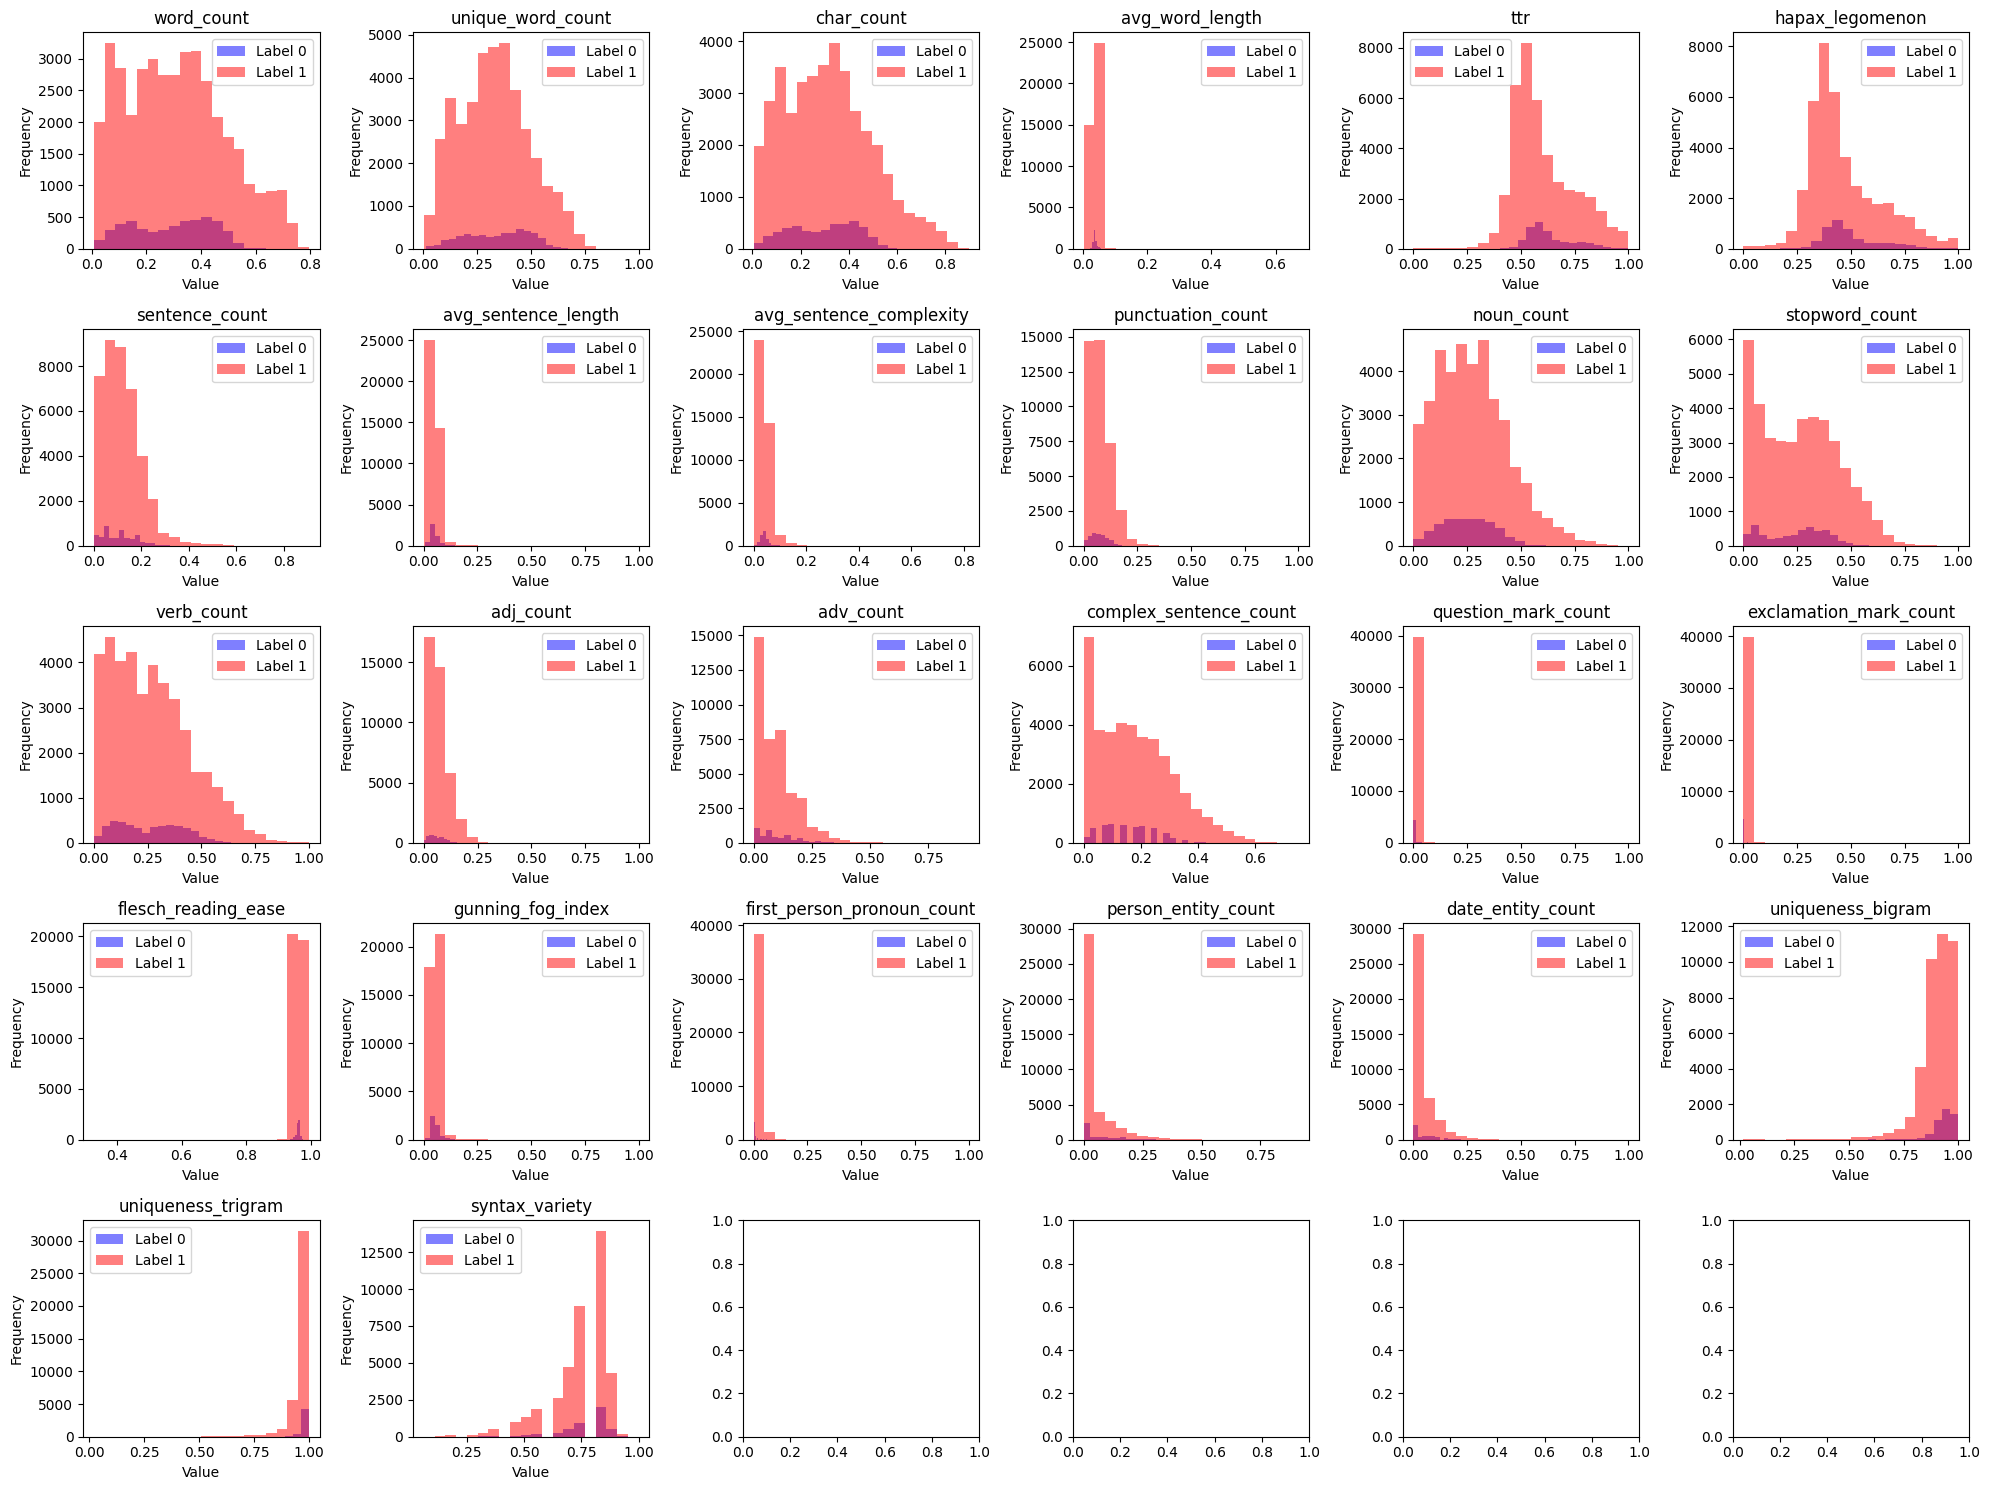

In [11]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
num_rows = 5
num_cols = 6

# Create a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the statistical features
for i, feature in enumerate(statistical_features):
    # Plot histogram for label 0
    axes[i].hist(df_train[df_train['label'] == 0][feature], bins=20, alpha=0.5, label='Label 0', color='blue')
    # Plot histogram for label 1
    axes[i].hist(df_train[df_train['label'] == 1][feature], bins=20, alpha=0.5, label='Label 1', color='red')
    # Set title and labels
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # Add legend
    axes[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
# list of unique values in language column
langs_train = df_train['language'].unique()

# for each language make the number of samples equal for both labels
df_train_balanced = pd.DataFrame()
for lang in langs_train:
    df_lang = df_train[df_train['language'] == lang]
    df_lang_label_0 = df_lang[df_lang['label'] == 0]
    df_lang_label_1 = df_lang[df_lang['label'] == 1]
    min_samples = min(len(df_lang_label_0), len(df_lang_label_1))
    df_lang_balanced = pd.concat([df_lang_label_0.sample(n=min_samples, random_state=42),
                                  df_lang_label_1.sample(n=min_samples, random_state=42)])
    df_train_balanced = pd.concat([df_train_balanced, df_lang_balanced])

In [20]:
df_train_balanced.groupby(['language', 'label']).size().reset_index(name='count')


,language,label,count
0,en,0,2820
1,en,1,2820
2,es,0,937
3,es,1,937
4,ru,0,999
5,ru,1,999


In [21]:
# save the balanced dataset
df_train_balanced.to_csv('dataset/dataset_train_balanced.csv', index=False)

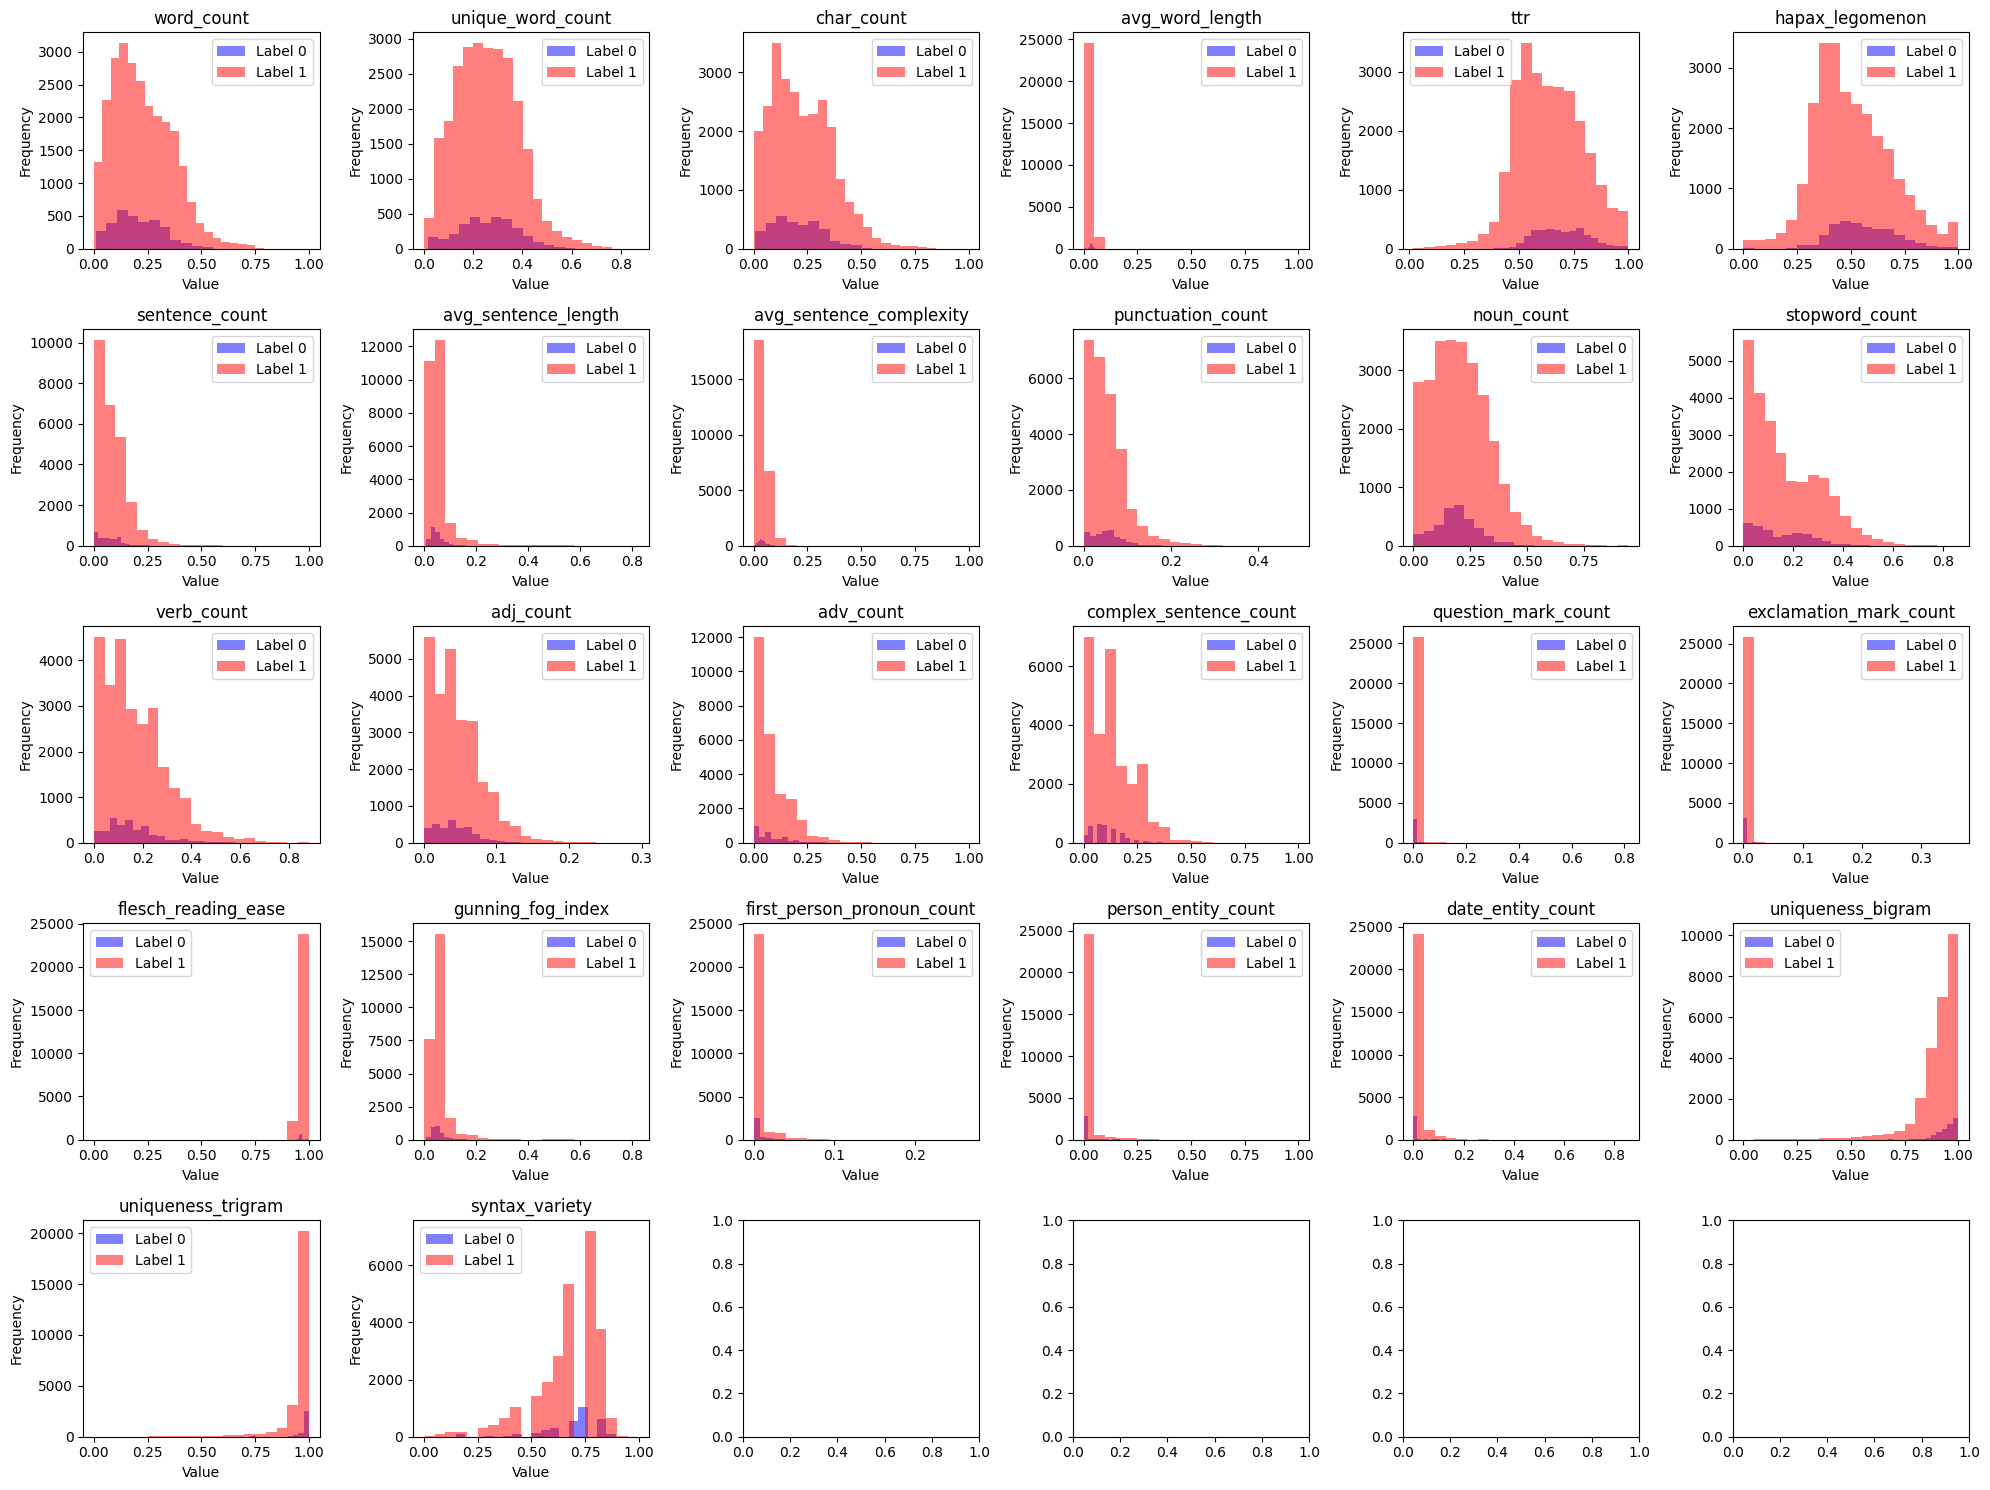

In [22]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
num_rows = 5
num_cols = 6

# Create a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the statistical features
for i, feature in enumerate(statistical_features):
    # Plot histogram for label 0
    axes[i].hist(df_test[df_test['label'] == 0][feature], bins=20, alpha=0.5, label='Label 0', color='blue')
    # Plot histogram for label 1
    axes[i].hist(df_test[df_test['label'] == 1][feature], bins=20, alpha=0.5, label='Label 1', color='red')
    # Set title and labels
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # Add legend
    axes[i].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()